<a href="https://colab.research.google.com/github/NavjyotDataScientist/From-Data-To-Decision/blob/main/2_0_credit_card_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Project: Credit Card Fraud Detection
# Problem Type: Binary Classification
# Core Challenge: Extreme class imbalance + real-world constraints
# Learning Coverage:
# EDA • Statistics • Imbalance handling • Feature engineering • ML models • Evaluation strategy • Industry thinking

In [43]:
import pandas as pd

file_path = '/content/drive/MyDrive/from-data-to-decision/2.0_credit_card_detection/creditcard.csv'
df = pd.read_csv(file_path)

display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
# Dataset Shape (Very Important)
df.shape

(284807, 31)

In [45]:
# Column Names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [46]:
# First & Last Rows
df.head()
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [47]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
# Missing Values Check
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [49]:
# target Variable Distribution (MOST IMPORTANT PART)
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [50]:
# Also check percentage:

df['Class'].value_counts(normalize=True) * 100

,proportion
Class,
0,99.827251
1,0.172749


In [51]:
# THIS IS THE CORE PROBLEM

# If a model predicts “not fraud” every time:

# Accuracy ≈ 99.83%

# Fraud detection = FAILURE

# This dataset exists to teach you humility in ML.

In [52]:
# EDA is not about making pretty charts.
# It is about understanding behavior.

# In this step, we will answer:

# How do fraud and non-fraud differ?

# Which features behave abnormally?

# What patterns might help a model?

# ⚠️ Important rule:
# We will only analyze these columns for now:

# Time

# Amount

# Class

# 👉 We do NOT touch V1–V28 yet. That fog comes later.

In [53]:
#Understand Class (Reconfirm the Battlefield)

#You already checked counts, but now we respect the imbalance.

#Run this (no plots yet):
fraud_count = df['Class'].value_counts()
fraud_percentage = df['Class'].value_counts(normalize=True) * 100

fraud_count, fraud_percentage

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    99.827251
 1     0.172749
 Name: proportion, dtype: float64)

In [54]:
# Separate Fraud vs Non-Fraud DataFrames

# This is a very important habit.

fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]


In [55]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [56]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [57]:
#Analyze Amount (Statistical First, Visual Later)
#Descriptive statistics
df['Amount'].describe()
fraud_df['Amount'].describe()
non_fraud_df['Amount'].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [58]:
#Analyze Time (This One Is Subtle)
df['Time'].describe()
fraud_df['Time'].describe()
non_fraud_df['Time'].describe()

,Time
count,284315.000000
mean,94838.202258
std,47484.015786
min,0.000000
25%,54230.000000
50%,84711.000000
75%,139333.000000
max,172792.000000


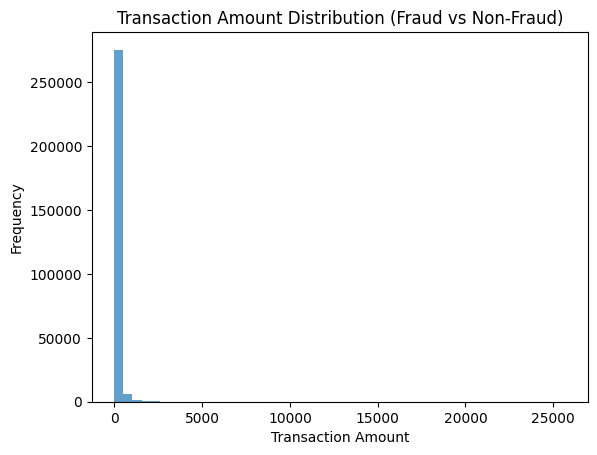

In [59]:
#Plot 1: Distribution of Amount (Fraud vs Non-Fraud)

#Run this in Colab:

import matplotlib.pyplot as plt

plt.figure()
plt.hist(non_fraud_df['Amount'], bins=50, alpha=0.7)
plt.hist(fraud_df['Amount'], bins=50, alpha=0.7)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Amount Distribution (Fraud vs Non-Fraud)")
plt.show()


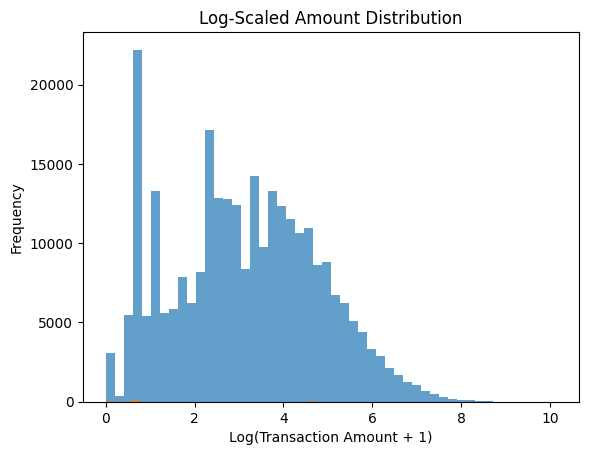

In [60]:
#Why We Need a Log View (Very Important)

#Raw Amount hides patterns.

#Run this:

import numpy as np

plt.figure()
plt.hist(np.log1p(non_fraud_df['Amount']), bins=50, alpha=0.7)
plt.hist(np.log1p(fraud_df['Amount']), bins=50, alpha=0.7)
plt.xlabel("Log(Transaction Amount + 1)")
plt.ylabel("Frequency")
plt.title("Log-Scaled Amount Distribution")
plt.show()

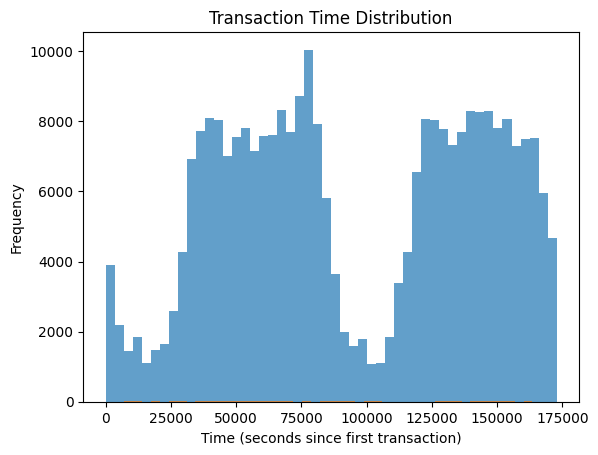

In [61]:
#Visualizing Time Question:

#Does fraud happen uniformly over time, or in bursts?

#Plot: Time distribution
plt.figure()
plt.hist(non_fraud_df['Time'], bins=50, alpha=0.7)
plt.hist(fraud_df['Time'], bins=50, alpha=0.7)
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.title("Transaction Time Distribution")
plt.show()

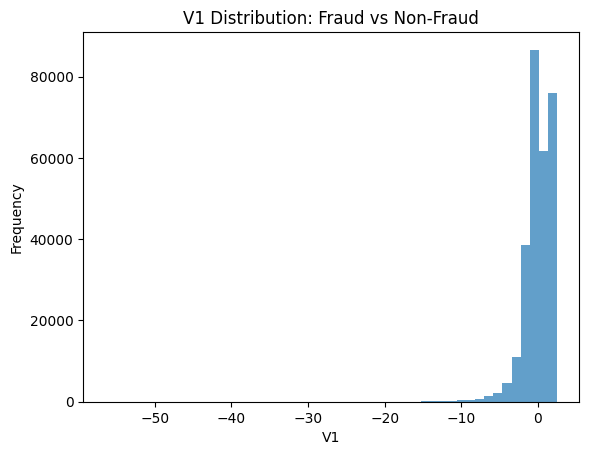

In [62]:
#Visualizing ONE PCA Feature (Safely)

#We start with just one feature.

#Plot V1 distribution:
plt.figure()
plt.hist(non_fraud_df['V1'], bins=50, alpha=0.7)
plt.hist(fraud_df['V1'], bins=50, alpha=0.7)
plt.xlabel("V1")
plt.ylabel("Frequency")
plt.title("V1 Distribution: Fraud vs Non-Fraud")
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [66]:
y_pred = lr.predict(X_test_scaled)


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56851    13]
 [   36    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
# # Three Ways to Handle Imbalance (Mental Map)

# # There are three levers. We will pull them one by one, not all together.

# | Lever              | What it does             | Risk   |
# | ------------------ | ------------------------ | ------ |
# | Class Weights      | Penalize missing fraud   | Low    |
# | Threshold tuning   | Change decision boundary | Medium |
# | Resampling (SMOTE) | Change data distribution | High   |


In [69]:
lr_weighted = LogisticRegression(
    max_iter=1000,
    class_weight={0: 1, 1: 10},
    random_state=42
)

lr_weighted.fit(X_train_scaled, y_train)

y_pred_weighted = lr_weighted.predict(X_test_scaled)


In [70]:
print(confusion_matrix(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))


[[56827    37]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.85      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
# THRESHOLD TUNING
# Deciding when the guard should shout
y_proba = lr_weighted.predict_proba(X_test_scaled)[:, 1]




In [72]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))



Threshold = 0.1
[[56717   147]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.89      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.76     56962
weighted avg       1.00      1.00      1.00     56962


Threshold = 0.2
[[56792    72]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.54      0.88      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Threshold = 0.3
[[56811    53]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.86      0.71        98

    accuracy                          

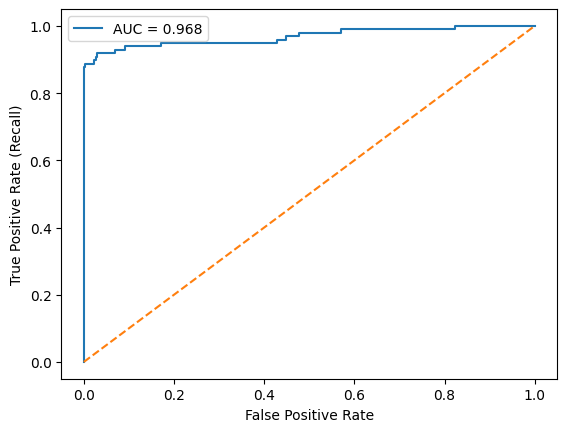

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()


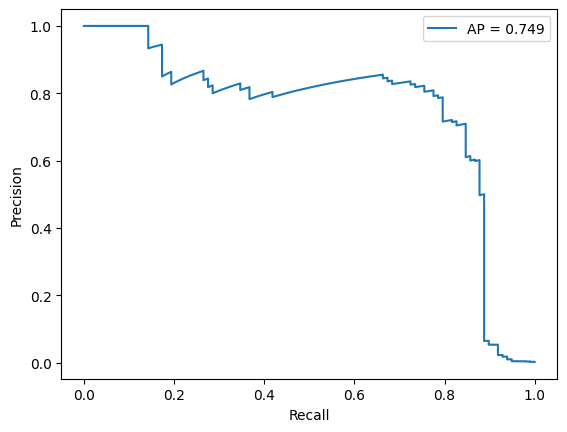

In [74]:
# How to Plot PR Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [75]:
# COST-BASED EVALUATION

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# --- Business costs ---
COST_FN = 1000   # fraud missed
COST_FP = 10     # normal transaction blocked

# Thresholds to evaluate
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)

    tn, fp, fn, tp = cm.ravel()
    total_cost = fn * COST_FN + fp * COST_FP

    results.append({
        "threshold": t,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp,
        "total_cost": total_cost
    })

# Convert to DataFrame for clarity
cost_df = pd.DataFrame(results)
cost_df


,threshold,TN,FP,FN,TP,total_cost
0,0.1,56717,147,11,87,12470
1,0.2,56792,72,12,86,12720
2,0.3,56811,53,14,84,14530
3,0.4,56822,42,15,83,15420
4,0.5,56827,37,15,83,15370
